In [27]:
from utils import *
import numpy as np
import matplotlib.pyplot as plt

class opt():
    pass
opt.pltlog=False

data2D = load_data("data/2022-12-08-rat_kidney.npy",to3D=False)
data3D = load_data("data/2022-12-08-rat_kidney.npy",to3D=True)

Opening data/2022-12-08-rat_kidney.npy
Converting data to array of 208297 spectra with 573 mass bins.
After removing empty spectra, 161547 sectra remain.
Opening data/2022-12-08-rat_kidney.npy
Converting data to image of 361 by 577 pixels with 573 mass bins.


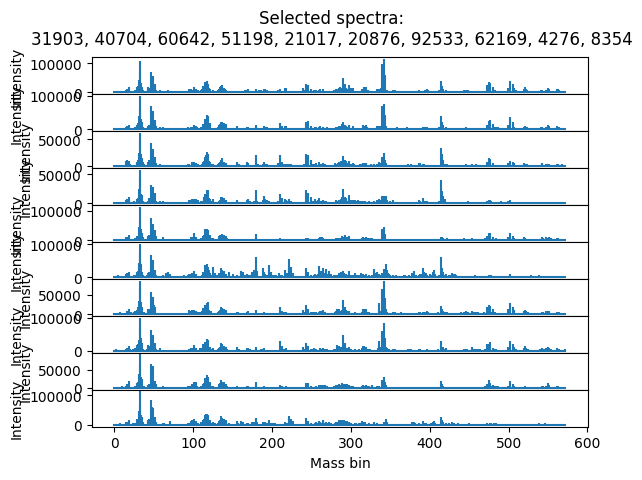

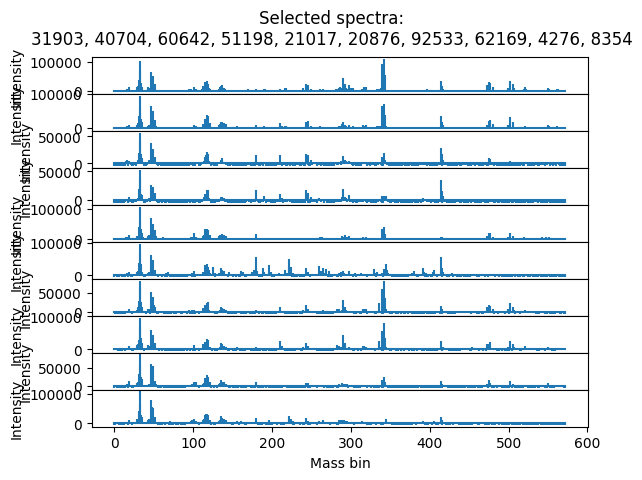

<module 'matplotlib.pyplot' from '/home/willem/Documents/Git/thesis/venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [28]:
randomspec = np.random.randint(0,len(data2D),size=10)
plot_spect(data2D,randomspec)

tot_mean = np.mean(data2D)
plot_spect(data2D-tot_mean,randomspec)


(161547, 573)


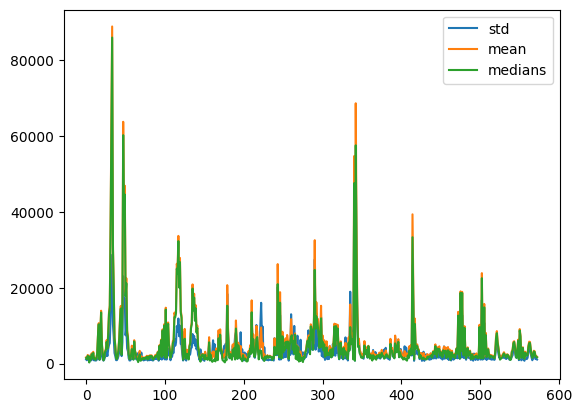

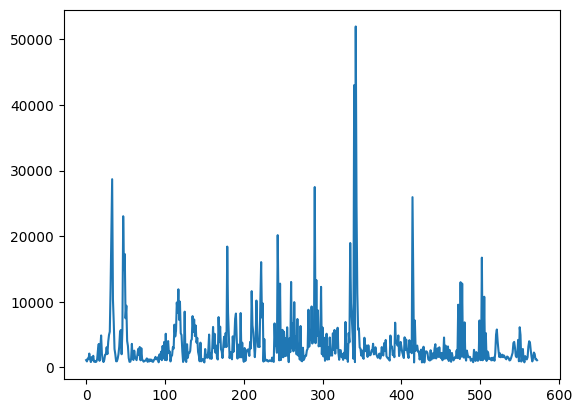

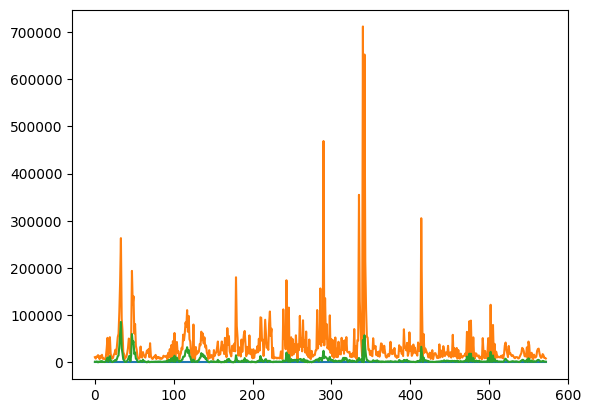

In [29]:
# data2D = data2D[:,:50]

print(np.shape(data2D))
# print(np.shape(np.mean(data2D,axis=0)))
stds = np.std(data2D,axis=0)
means = np.mean(data2D,axis=0)
medians = np.median(data2D,axis=0)
vars = np.var(data2D,axis=0)
mins = np.min(data2D,axis=0)
maxs = np.max(data2D,axis=0)

plt.plot(stds)
plt.plot(means)
plt.plot(medians)
plt.legend(['std','mean','medians'])
plt.show()

plt.plot(stds)
plt.show()

plt.plot(mins)
plt.plot(maxs)
plt.plot(medians)
plt.show()

/tmp/ipykernel_4574/801641774.py:8: RuntimeWarning: invalid value encountered in divide
  normalized[i,:]=((data2D[i,:]-mean[i])/std[i])


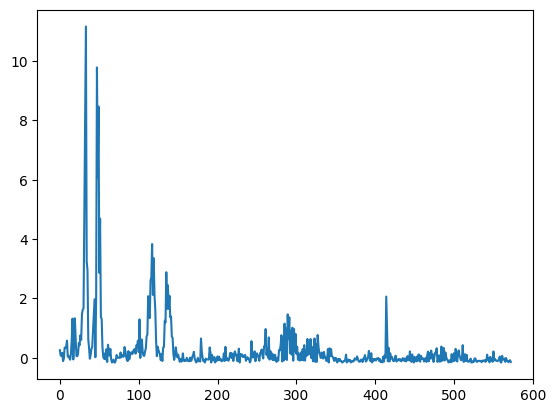

-573
(161547, 573) (161547, 573)


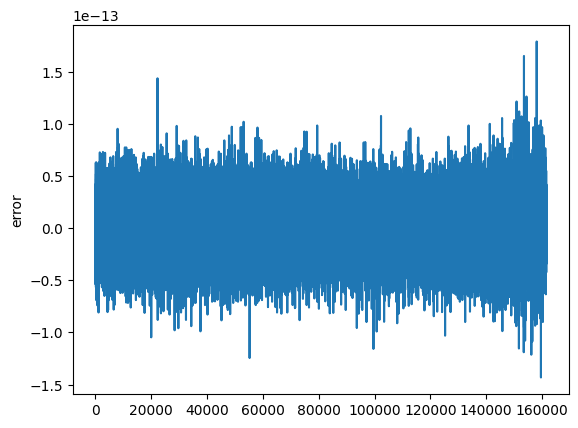

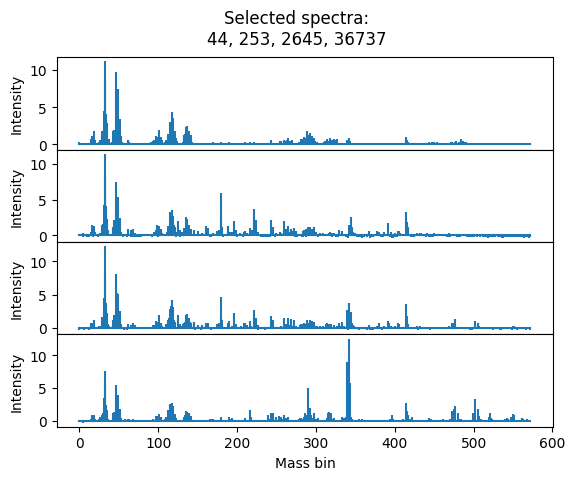

<module 'matplotlib.pyplot' from '/home/willem/Documents/Git/thesis/venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

: 

In [56]:
mean = np.mean(data2D,axis=1)
std = np.std(data2D,axis=1)

normalized = np.zeros(np.shape(data2D))
normalized[0,:]=((data2D[0,:]-mean[0])/std[0])
for i in range(len(mean)):
    normalized[i,:]=((data2D[i,:]-mean[i])/std[i])

plt.plot(normalized[0])
plt.show()

recovered = np.zeros(np.shape(data2D))
for i in range(len(mean)):
    recovered[i]=(normalized[i,:]*std[i])+mean[i]

plt.plot(np.mean(data2D-recovered,axis=1))
plt.ylabel('error')
plt.xlabel('spectra number')
plt.show()
print(np.sum(abs(data2D-recovered)<=0.0001)-np.shape(data2D)[0]*np.shape(data2D)[1])
print(np.shape(recovered),np.shape(normalized))
plot_spect(normalized,[44,253,2645,36737])

In [ ]:
randomslice = np.random.randint(0,len(data3D))

In [ ]:
def get_labels(path):
    with np.load(path,allow_pickle=True) as nmfdata:
        w = nmfdata['w']
        h = nmfdata['h']
    classes = []
    for i in range(len(w)):
        wline = w[i]
        classes.append(np.argmax(w[i]))
    return classes
labels = get_labels('data/orthogonal_nmf.npz')


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
Class 0 occurs 14056 times
Class 1 occurs 2343 times
Class 2 occurs 9485 times
Class 3 occurs 679 times
Class 4 occurs 18 times
Class 5 occurs 449 times
Class 6 occurs 16147 times
Class 7 occurs 11969 times
Class 8 occurs 18443 times
Class 9 occurs 5955 times
Class 10 occurs 12937 times
Class 11 occurs 14463 times
Class 12 occurs 4523 times
Class 13 occurs 3257 times
Class 14 occurs 6416 times
Class 15 occurs 722 times
Class 16 occurs 15149 times
Class 17 occurs 6118 times
Class 18 occurs 14591 times
Class 19 occurs 3827 times


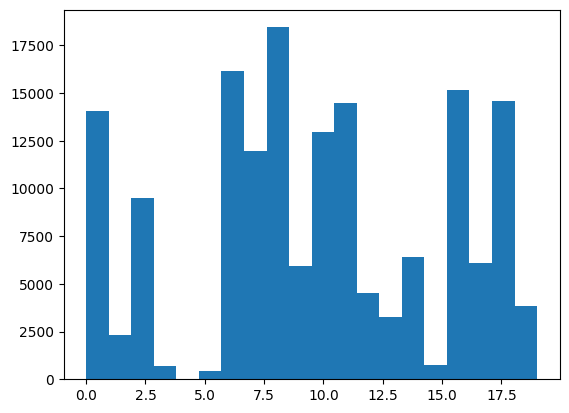

In [ ]:
classes_set = set(classes)
print(classes_set)

occurences = []
for i in classes_set:
    print("Class %i occurs %i times" %(i,classes.count(i)))
    occurences.append(classes.count(i))
plt.hist(classes,bins=len(occurences))
plt.show()